COMP 215 - LAB 4 (Graphs)
-------------------------
#### Name: Santiago Sanchez,
#### Date: feb 2 2026

This lab exercise is an introduction to Graphs and Graph Analysis using [NetworkX](https://networkx.org/documentation/stable/).

**New Python concepts**:
  * **NetworkX** is an open-source package.  It provides a `Graph` object to represent a graph.
  * Built-in `random` module provides algorithms for generating pseudo-random sequences
  * [Generator expression](https://towardsdatascience.com/understanding-generator-expressions-in-python-fe0c4534619) - similar to a list comprehension, but faster and using much less memory!

**Credits**:
    claude.ai(formula to choose opotimal n_trials )

As usual, the first code cell simply imports all the modules we'll be using...

In [ ]:
%matplotlib inline

import math
import random
from timeit import timeit

import matplotlib.pyplot as plt
import networkx as nx

## ER Graph algorithms.

from the textbook...
> One of the more interesting [random graphs](https://en.wikipedia.org/wiki/Random_graph) is the Erdős-Rényi model, studied by Paul Erdős and Alfréd Rényi in the 1960s.

> An Erdős-Rényi graph (ER graph) is characterized by two parameters: $n$ is the number of nodes and $p$ is the probability that there is an edge between any two nodes.

> Erdős and Rényi studied the properties of these random graphs; one of their surprising results is the existence of abrupt changes in the properties of random graphs as random edges are added.

In this lab we will work towards re-producing this famous computational experiment.

We can start with all the code we developed in class.
Review development of these algorithms in teh `week04-graphs` workbook.

We `seed` Python's built-in random number generator so we get the same sequence each time (to facilitate debugging and comprehension!)  Comment this out and re-run the notebook when you are ready to run experiments.

In [61]:
random.seed(6) # Comment this out to run randomized experiments

In [62]:
def all_pairs(objects):
    """ Return a generator with the complete set of distinct object pairs, as 2-tuples, from the given iterable of objects """
    return ((a, b) for i in range(1, len(objects)) for a,b in zip(objects, objects[i:]))

# unit tests
assert set( all_pairs(('w', 'x', 'y', 'z')) ) == {('w', 'x'), ('x', 'y'), ('y', 'z'), ('w', 'y'), ('x', 'z'), ('w', 'z')}

In [63]:
def coin_toss(p=0.5):
    """ Simulate flipping a biased "coin", where the probability of 'heads' is p.  Return True iff 'heads', False otherwise """
    return random.random() < p

In [64]:
def random_pairs(objects, p=0.5):
    """ Return a generator of random subset of distinct object pairs (2-tuples), each with a probability of `p` """
    return (pair for pair in all_pairs(objects) if coin_toss(p))  # "flip a coin" to determine whether a given pair is included.

# Notice: no way to automate tests for random functions because they produce "side-effects" !!!
list( random_pairs(('w', 'x', 'y', 'z'), p=0.5) )

[('y', 'z'), ('w', 'y'), ('x', 'z')]

In [65]:
def make_random_graph(n, p):
    """ Return an ER Graph with n nodes, where the probability of an edge between a pair of nodes in p """
    graph = nx.Graph()
    labels = range(n)
    graph.add_nodes_from(labels)
    graph.add_edges_from(random_pairs(labels, p))
    return graph

### Experiment:  Randomly connected graphs
The following experiment creates a graph with $N$ nodes where the probability of any 2 nodes being connected is $p$

using abstraction to break the program apart


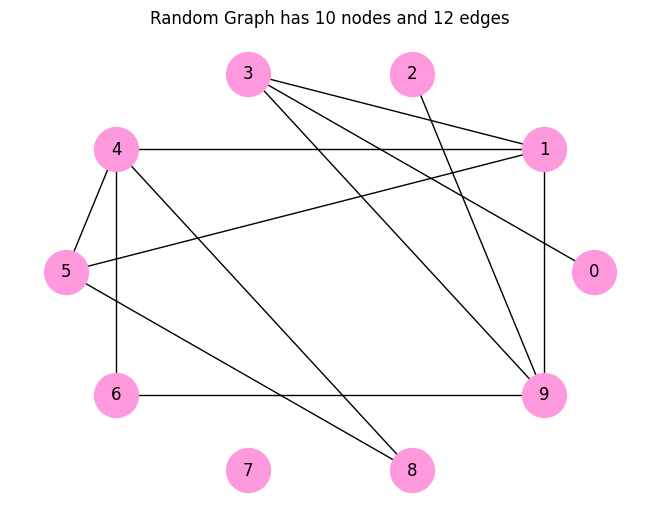

In [66]:
N = 10
p = 0.35 # changes the porbability of number of nodes connected by the amount given

random_graph = make_random_graph(N, p)

nx.draw_circular(random_graph,
                 node_color='#ff99dd',
                 node_size=1000,
                 with_labels=True)
plt.gca().set(
    title=f'Random Graph has {random_graph.number_of_nodes()} nodes and {random_graph.number_of_edges()} edges'
)
plt.show()

In [67]:
def reachable_nodes(graph, start):
    """ return the set of nodes that are reachable from the given start node"""
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(graph.neighbors(node))
    return seen

In [68]:
def is_connected(graph):
    """ Return True if the graph is connected, false otherwise. """
    start = next(iter(graph))   # grab the first node in the graph.  This statement will need some further explanation.
    reachable = reachable_nodes(graph, start)
    return len(reachable) == len(graph)

In [69]:
is_connected(random_graph)

False

## Lab Exercises

### Exercise 1
Use `timeit` to run an experiment that times the `reachable_nodes` algorithm.
Once you understand how `timeit` works, design a small experiment to time the `reachable_nodes` algorithm for a range of graph sizes (`n`)
Plot the results of your experiment, where x = graph size (`n`) and y = avg. execution time in seconds

In [70]:
# here's an example of how to use timeit:
N = 100
p = 1
g = make_random_graph(N, p)  # when p=1, this is a complete graph!
timing_trials = 5
seconds = timeit(lambda: reachable_nodes( g,  0),  number=timing_trials)
f'Avg. time to execute: {seconds/timing_trials} seconds'

'Avg. time to execute: 0.0006261247999646002 seconds'

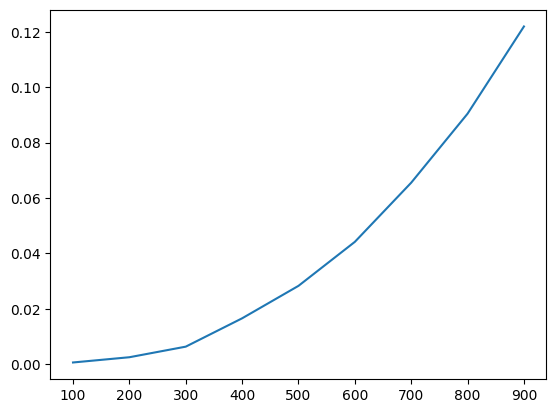

In [71]:
# Ex. 1 your code here...


list_x = []
list_y = []
for N in range(100, 1000, 100):
  g = make_random_graph(N, p)
  y = timeit(lambda: reachable_nodes(g, 0), number=N)
  average = y/N
  list_x.append(N)
  list_y.append(average)

plt.plot(list_x, list_y)
plt.show()




### Exercise 2:
What is the **Big-O time complexity** of the `reachable_nodes` algorithm?

#### Ex. 2 Your Answer: 2^n


## Likelihood of connectivity

We are ready to replicate Erdős and Rényi's computational experiment.
In this experiment, we estimate the likelihood that a randomly-generated ER graph is connected.

Like most computational experiments, we simple "brute force" the solution - create a big pile of ER graphs, and simply count up how many of them are connected.

### Exercise 3:
Write a function that runs one ER experiment for a given value of $n$ and $p$.

The function generates `n_trials` (number of trials) graphs and returns the proportion of them that are connected.

In [72]:
def proportion_connected(n, p, n_trials=100):
    """ Return the proportion of random ER Graphs (n, p) that are connected out of n_trials. """
    # Ex. 3 your code here...
    # Step 1: make n_trials random graphs
    counter = 0

    for i in range(n_trials):
      graph = make_random_graph(n,p)
      graph_connected = is_connected(graph)

      if graph_connected is True: counter += 1

    # Step 2: compute the proportion of those graphs that are connected

    return counter / n_trials

n = 30
p = 0.1
p_connected = proportion_connected(n, p)*100
f'Likelihood that an ER graph (n={n}, p={p}) is connected: {p_connected:.1f}%'

'Likelihood that an ER graph (n=30, p=0.1) is connected: 21.0%'

### Exercise 4:
Our experimental results will be more accurate (i.e., show less variation between runs) when we use large for `n_trials`.  But we've seen that large values for `n` can cause serious performance issues.
Experiment a little to find a reasonable value of `n_trials` to experiment with.  Ideally you would produce a timing graph like the one in Ex. 1, but that's optional

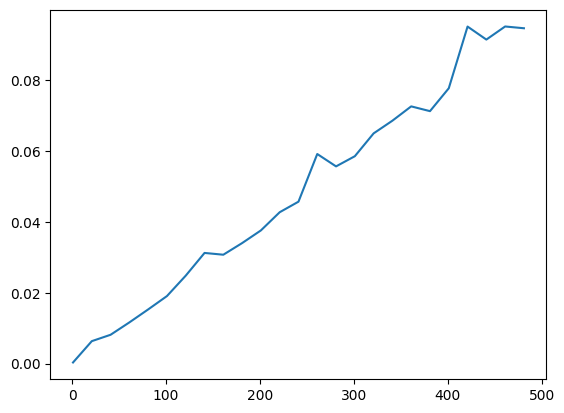

1.8937777199971606

In [111]:
# Ex. 4 timing experiments

n = 20 # number of nodes
n_trials = 501
#List accucmulators
n_size_trial = []
proportion_list = []

p = 0.25 #fixed p value for how much the nodes are connected
p_times = [random.random() for i in range(20)] #list of 20 probabilities between 0 and not including 1
n_possible_trials = list(range(1, n_trials, 20))

for n_trial in n_possible_trials: #iterate through every value, se which on is the one with the lowest runtime
  n_size_trial.append(n_trial)
  proportion_list.append(timeit(lambda: proportion_connected(n, p, n_trial), number=1))

plt.plot(n_size_trial, proportion_list)
plt.show()

time = 20 * n_trials * (proportion_list[-1]/n_trials) # number of different probabilities times the n_trials (looking for) * time of a single operation (last one)
time

What is a reasonable value for `n_trials` to use in the experimental setup below where we will run trials for 20 different values of $p$?

#### Your Answer: 250. based on the experiment that i ran, running 20 different probabilities with 500 n_trials would take me 2 seconds, even though this number is good, i think i will have enough information staying at 250 n_trials, at the same time i will void the exponential hump between 250 and 300. Since i alredy know the graph will go up


## Critical Value of $p$

Near a "critical value" of $p$, the likelihood of a random graph being connected rapidly changes from near 0 to near 1.
Erdős and Rényi predict the critical value should be:  $ln(n) / n$
For example...

In [ ]:
n = 30
f'Erdős and Rényi predict the critical value of p for graphs of size {n} = {math.log(n) / n:0.3f}'

'Erdős and Rényi predict the critical value of p for graphs of size 30 = 0.113'

### Exercise 5:
Develop an experimental setup that estimates the `proportion_connected` for different values for $p$.
You will need to **define a suitable range of values for $p$**, and **choose a value for $n_trials$ (determined above)**.
The goal of this experiment is to **plot $p$ against `proportion_connected(p)` to identify the "critical value" of $p$ for graphs of size $n$**.  This will be the point where the random graphs change from being primarily disconnected to being primarily connected.

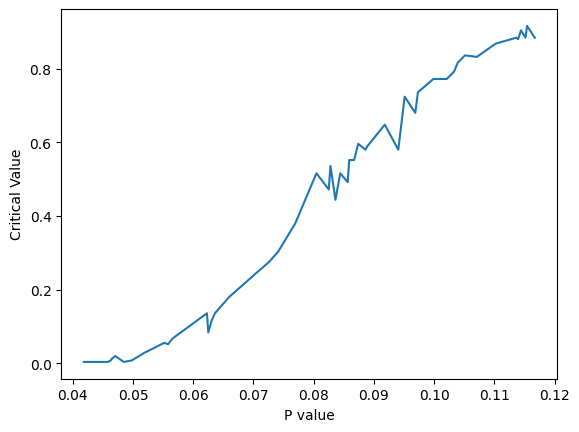

In [113]:
# Ex. 5 your code here...
n_trials = 250 #value for number of trials
n = 50 #size n of graph

log = round(math.log(n) / n, 3)
p_value = [random.uniform((log - (log / 2)), (log + (log / 2))) for i in range(50)] #suitable range of values for p
p_value.sort()
critical_p_list = [proportion_connected(n, proportion, n_trials) for proportion in p_value] #list comprehension to get the amount of list connected

plt.plot(p_value, critical_p_list) #plotting p_value against critical_list to look for p critical
plt.xlabel("P value")
plt.ylabel("Critical Value")
plt.show()

### Exercise 6:
Does your experiment confirm or refute Erdős and Rényi's results?

What real-world applications / implications might this understanding of graph connectivity have?

#### Ex. 6 Your Answer:
as more nodes are added, the graph starts taking a normal distributed relationship, whereas as at the begging we can see that there's a lot of variation, the graph just needed more nodes and trials to change the graph shape and realationship.,

this application can be used for social media, to see the likelihood of getting new users when other users join to the app, or to see the reach of a marketing campaing in a region of people with certain characteristics